Q. house_train.csv 데이터 셋에 대하여 케라스를 이용하여 다음 사항을 수행하세요.
- 데이터 파악하기
- 결측치, 카테고리 변수 처리하기
  - 속성별로 결측치가 몇 개인지 확인
  - 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 준다.
  - 결측치를 전체 칼럼의 평균으로 대체하여 채워준다.
  - 업데이트된 데이터프레임을 출력
- 속성별 관련도 추출하기
  - 데이터 사이의 상관 관계 파악
  - 집 값과 관련도가 가장 큰 10개의 속성들을 출력
  - 집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프 시각화(pair plot)
- 주택 가격 예측 모델 생성 및 평가
  - X, y 분리
  - 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정 : sklearn.model_selection 모듈의 train_test_split 이용
  - 모델 생성 :
    - 첫번째 : 입력 은닉 공용 10개 유닛,
    - 두번째 : 은닉 30개 유닛,
    - 세번째 : 은닉 40개 유닛,
    - 네번째 : 출력 1개 유닛
  - 모델 컴파일 : optimizer ='adam', loss = 'mean_squared_error'
  - 실행 관련 설정 : validation_split=0.25, epochs=150, batch_size=32



## 데이터 파악하기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

#데이터를 불러 옵니다.
df = pd.read_csv("/content/drive/MyDrive/kdt_231026/m6_dl/data/house_train.csv")

#데이터를 미리 살펴 보겠습니다.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

## 2. 결측치, 카테고리 변수 처리하기

In [4]:
#속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [5]:
#카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.(12장 3절)
df = pd.get_dummies(df)

#결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다.
df = df.fillna(df.mean())

#업데이트된 데이터프레임을 출력해 봅니다.
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


## 3. 속성별 관련도 추출하기

In [6]:
#데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

#집 값과 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)

#집 값과 관련도가 가장 큰 10개의 속성들을 출력합니다.
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

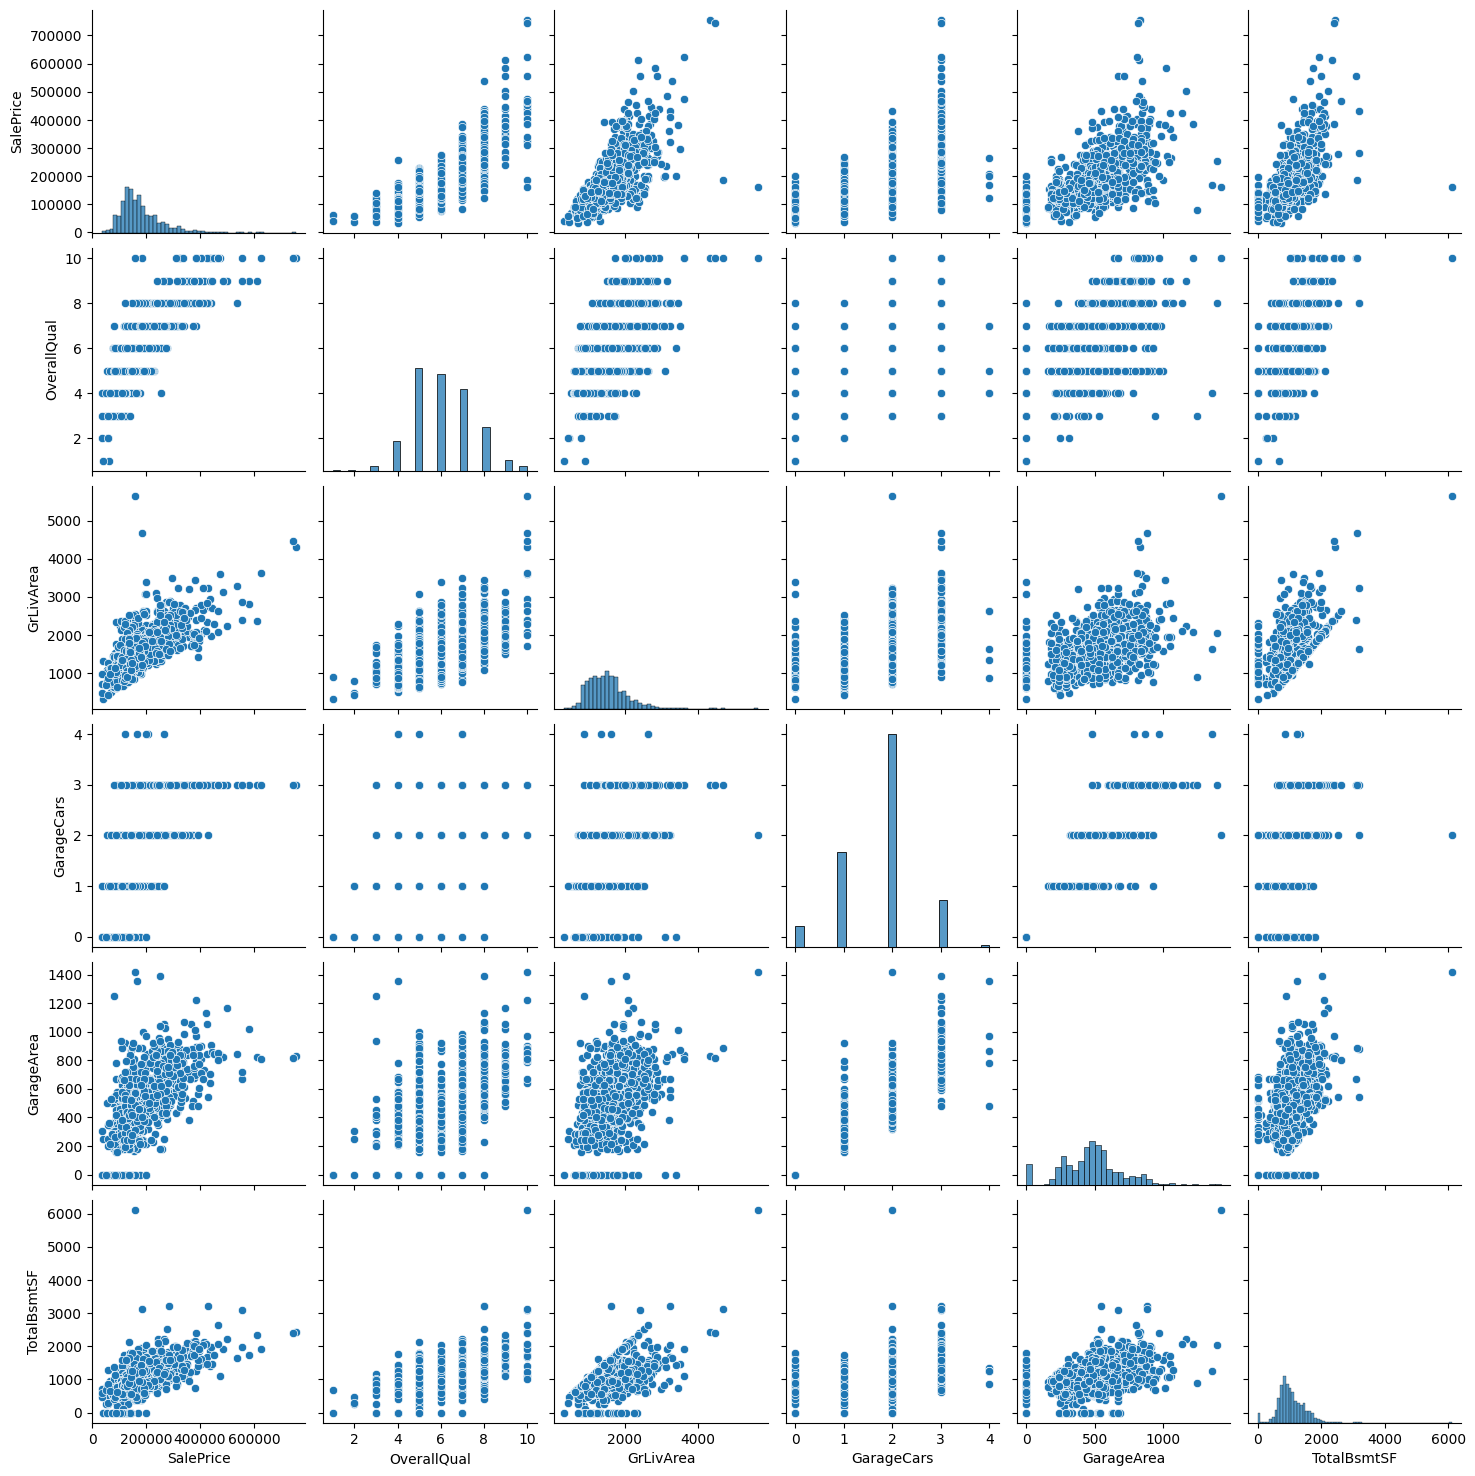

In [7]:
#집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])
plt.show();

## 4. 주택 가격 예측 모델

In [8]:
#집 값을 제외한 나머지 열을 저장합니다.
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

#집 값을 저장합니다.
y = df['SalePrice'].values

In [9]:
#전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [10]:
#모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

#모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/kdt_231026/m6_dl/data/model/Ch15-house.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

# 테스트 데이터를 사용하여 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1671 (6.53 KB)
Trainable params: 1671 (6.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
28/28 [==============================] - ETA: 0s - loss: 38846840832.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 3s 28ms/step - loss: 38846840832.0000 - val_loss: 40747028480.0000
Epoch 2/2000
28/28 [==============================] - 0s 5ms/step - loss: 38174474240.0000 - val_loss: 39748567040.0000
Epoch 3/2000
28/28 [==============================] - 0s 5ms/step - loss: 36778262528.0000 - val_loss: 37544525824.0000
Epoch 4/2000
28/28 [==============================] - 0s 5ms/step - loss: 33643268096.0000 - val_loss: 32785858560.0000
Epoch 5/2000
28/28 [==============================] - 0s 6ms/step - loss: 27320090624.0000 - val_loss: 23672219648.0000
Epoch 6/2000
28/28 [==============================] - 0s 5ms/step - loss: 16771107840.0000 - val_loss: 11273151488.0000
Epoch 7/2000
28/28 [==============================] - 0s 5ms/step - loss: 6353035264.0000 - val_loss: 3273502208.0000
Epoch 8/2000
28/28 [==============================] - 0s 5ms/step - loss: 2501816576.0000 - val_loss: 2477300224.0000
Epoch 9/2000
28/28 [==============================] - 0s

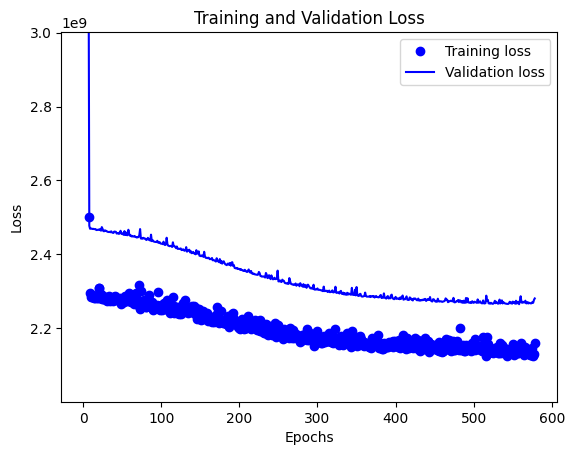

In [14]:
import matplotlib.pyplot as plt

# 학습 과정에서의 손실값 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 에포크(Epoch) 번호 생성
epochs = range(1, len(train_loss) + 1)

# 손실값 시각화
plt.plot(epochs, train_loss, 'bo', label='Training loss')  # 'bo'는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # 'b'는 파란색 실선을 의미
plt.title('Training and Validation Loss')
plt.ylim([2001257984,3001257984])
# plt.xlim([0,150])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [15]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 2ms/step
실제가격: 128500.00, 예상가격: 148893.53
실제가격: 423000.00, 예상가격: 314586.62
실제가격: 214900.00, 예상가격: 206602.72
실제가격: 240000.00, 예상가격: 239620.80
실제가격: 148000.00, 예상가격: 171581.84
실제가격: 79000.00, 예상가격: 59982.76
실제가격: 177500.00, 예상가격: 136162.56
실제가격: 181000.00, 예상가격: 192771.41
실제가격: 125500.00, 예상가격: 143938.36
실제가격: 112500.00, 예상가격: 122081.76
실제가격: 173500.00, 예상가격: 167650.28
실제가격: 172500.00, 예상가격: 202866.72
실제가격: 119000.00, 예상가격: 122086.09
실제가격: 320000.00, 예상가격: 258825.64
실제가격: 134432.00, 예상가격: 116339.92
실제가격: 135000.00, 예상가격: 134045.84
실제가격: 140000.00, 예상가격: 177596.08
실제가격: 345000.00, 예상가격: 266345.59
실제가격: 108480.00, 예상가격: 139242.56
실제가격: 138800.00, 예상가격: 136055.83
실제가격: 287000.00, 예상가격: 308031.97
실제가격: 139000.00, 예상가격: 133802.00
실제가격: 129500.00, 예상가격: 198381.22
실제가격: 295000.00, 예상가격: 373842.09
실제가격: 139000.00, 예상가격: 143687.34


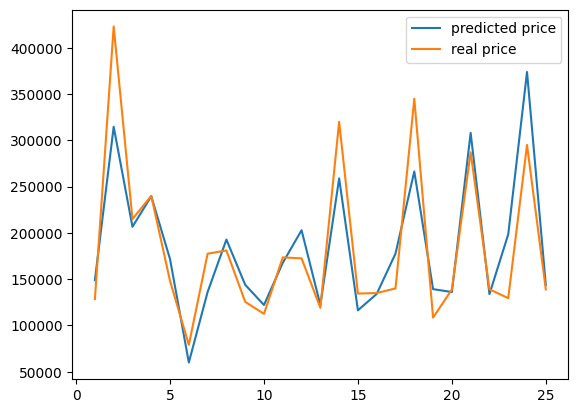

In [16]:
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()